Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2


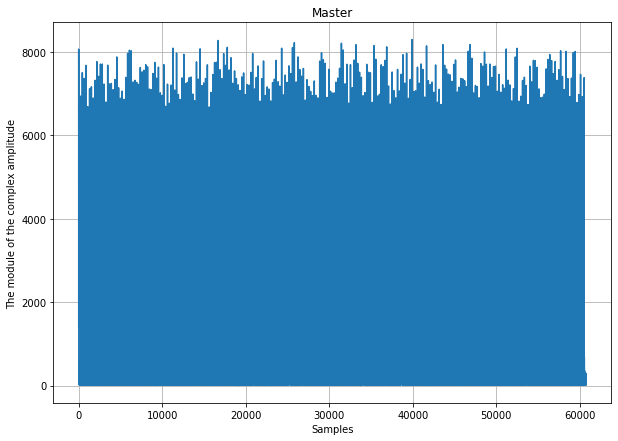

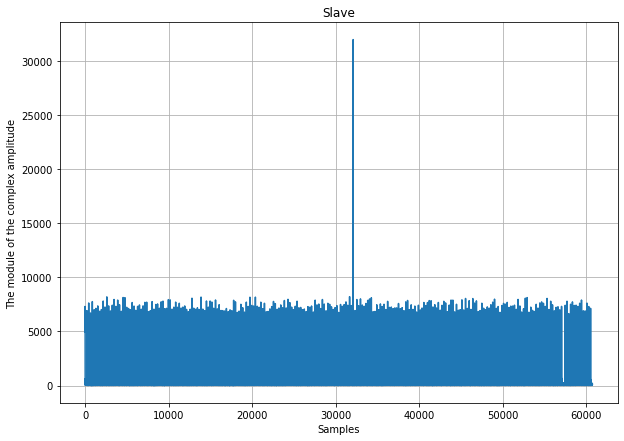

3


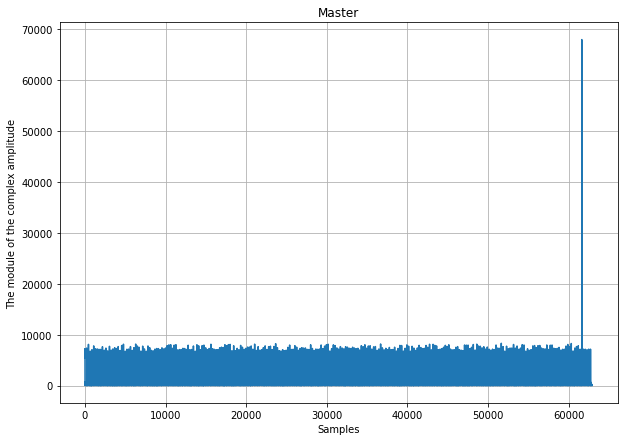

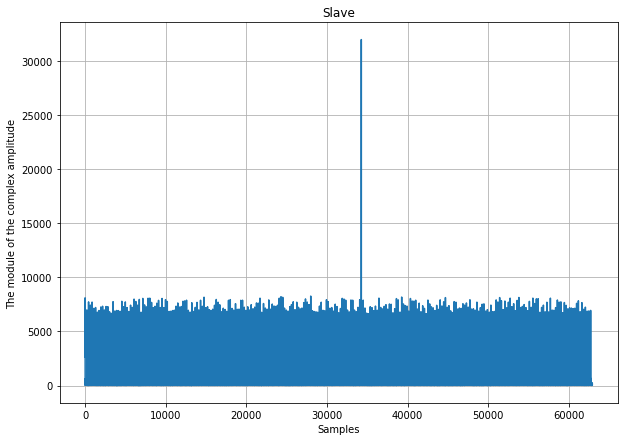

4


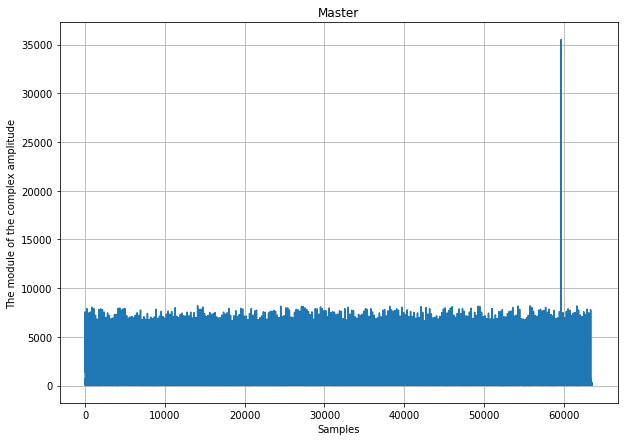

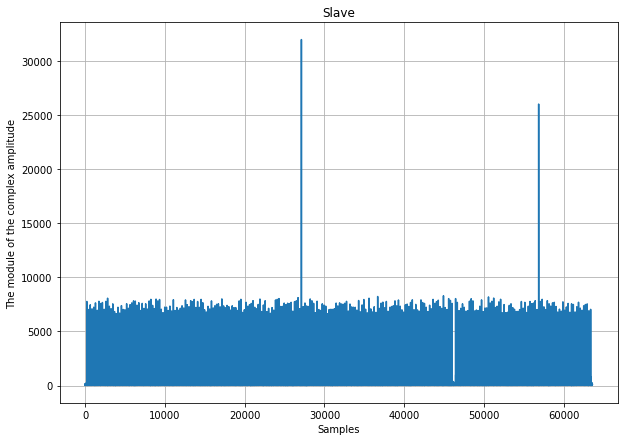

5


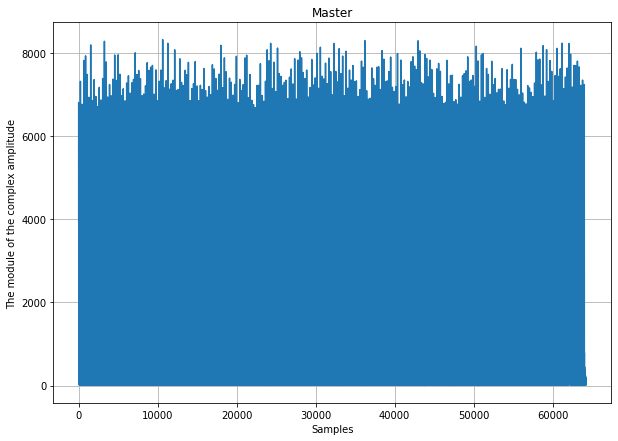

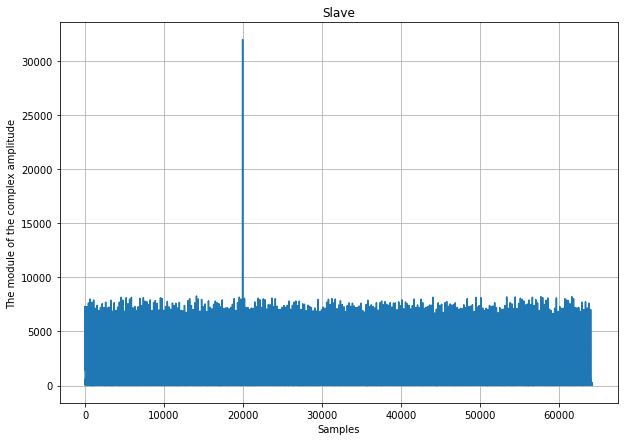

6


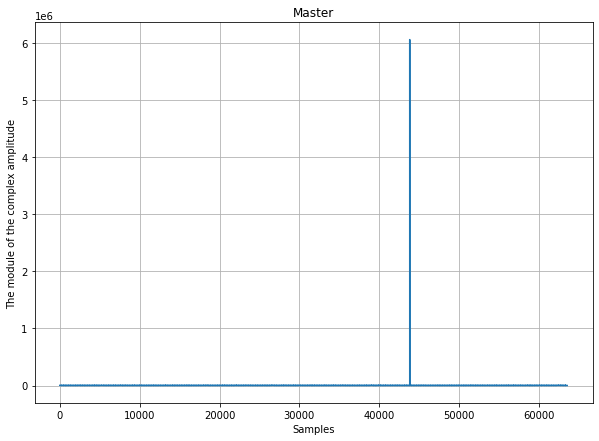

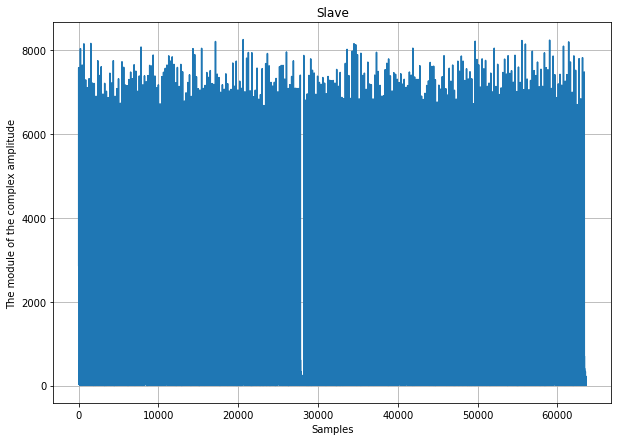

7


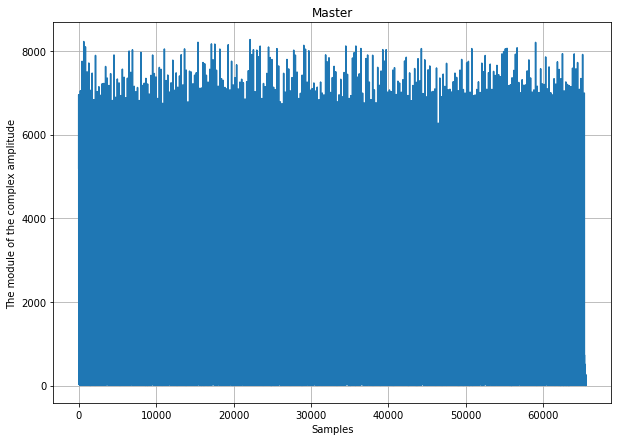

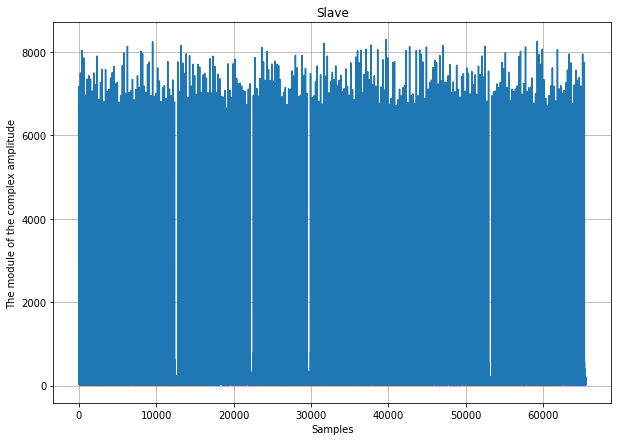

8


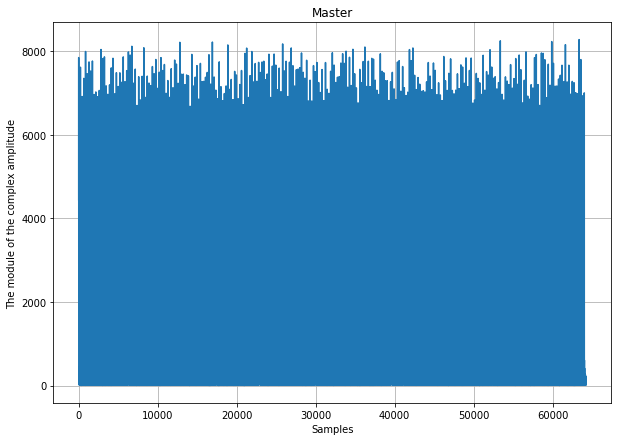

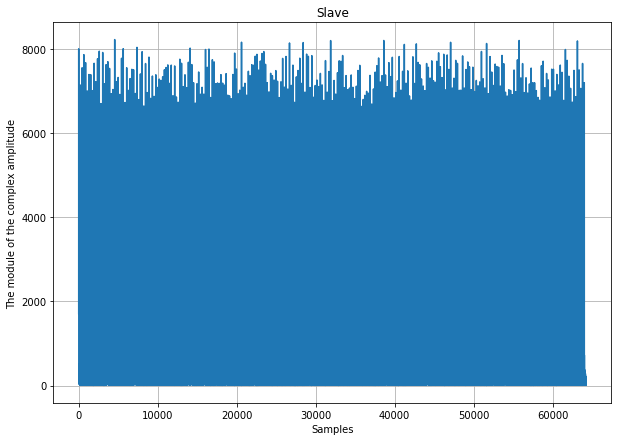

9


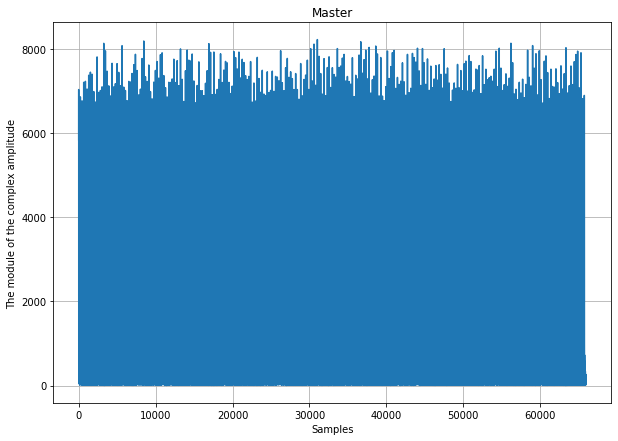

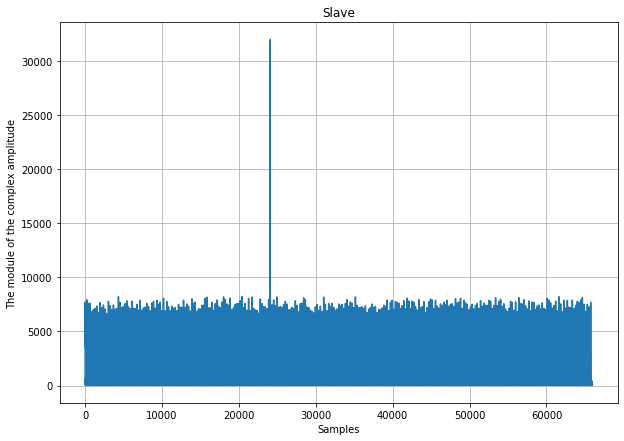

10


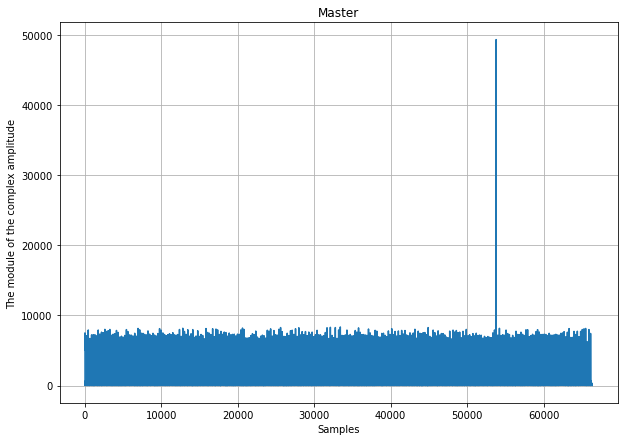

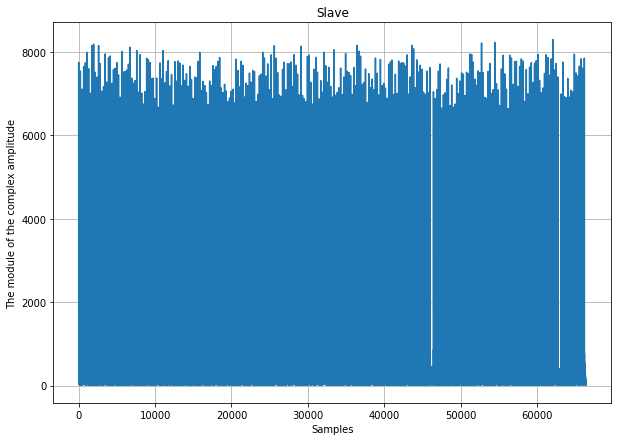

11


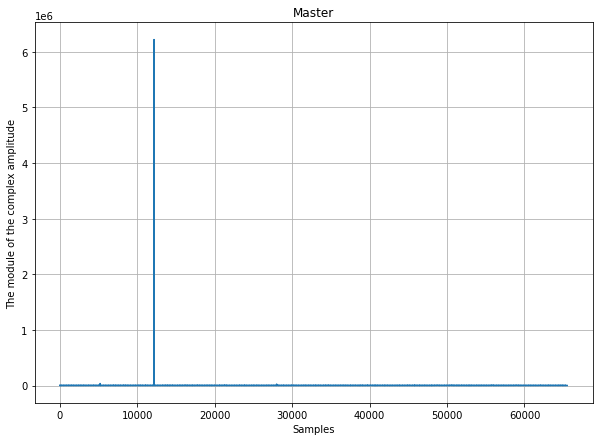

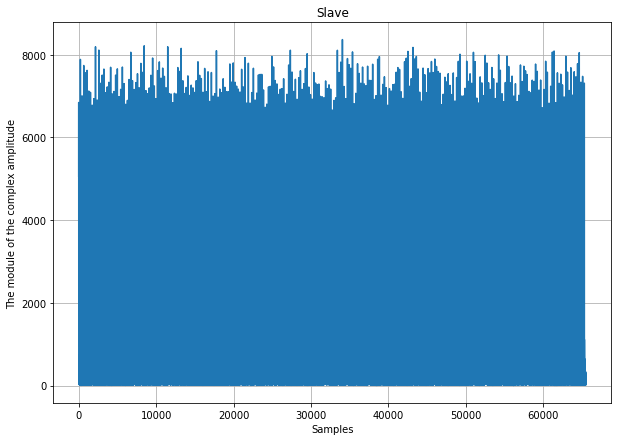

12


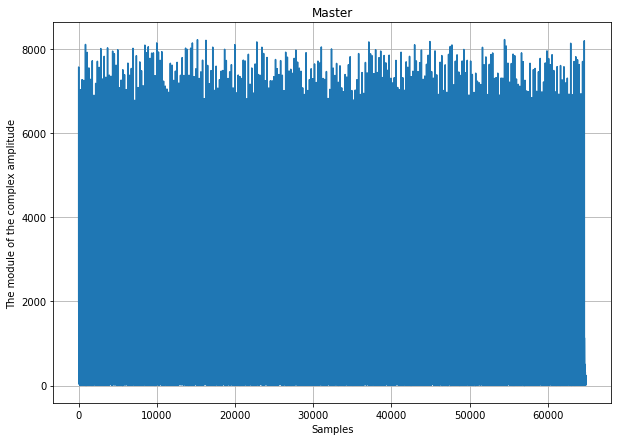

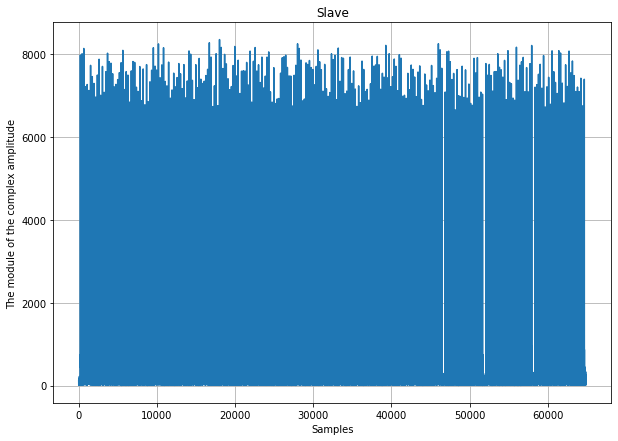

13


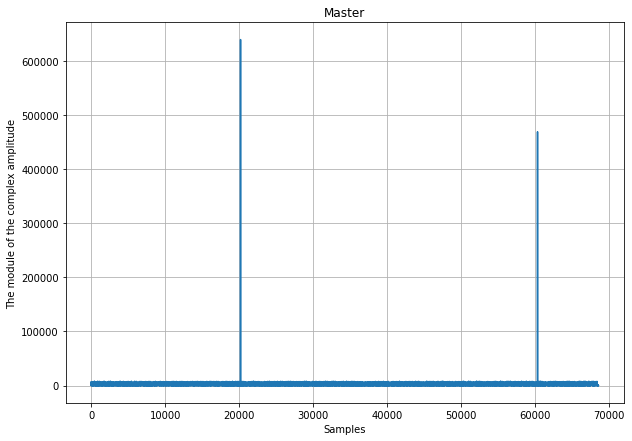

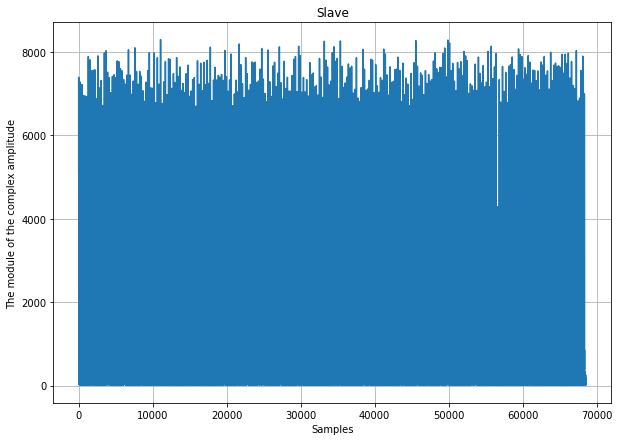

14


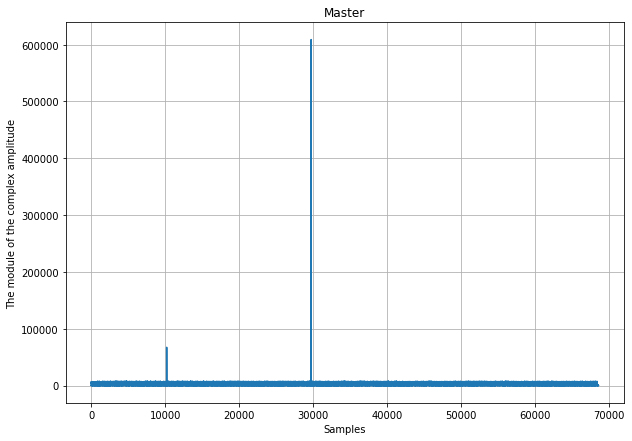

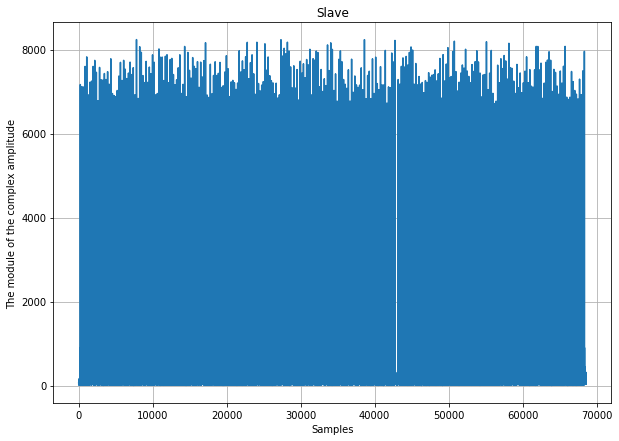

Master_real (279, 868)
Master_real (289, 868)
Master_real (293, 868)
Master_real (295, 868)
Master_real (292, 868)
Master_real (301, 868)
Master_real (296, 868)
Master_real (303, 868)
Master_real (305, 868)
Master_real (301, 868)
Master_real (299, 868)
Master_real (315, 868)
Master_real (315, 868)


In [ ]:
import numpy as np
import pandas as pd
from PIL import Image    #  pip install Pillow

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


import shutil
from os import path


from google.colab import drive
drive.mount('/content/drive')


import sys
sys.path.append(r'/content/drive/My Drive/Colab Notebooks')
from Parser2 import make_csv


#генерируем csv

def gen_csv(indexex):
  path = '/content/drive/My Drive/Row_data/'
  destination_path = '/content/drive/My Drive/Experiments/'

  #file_names = []
  #file_csv_names = []

  for ind in indexex:
    file_names = path + '13.04_test' + str(ind) + '.txt'
    file_csv_names = destination_path + 'SaveFile2_exp_' + str(ind) + '.csv'
    print(ind)
    make_csv(file_names, file_csv_names)

    #if path.exists(file_csv_names):
      #new_location = shutil.move(file_csv_names, destination_path)

    #else:
     #print('File not exist')









#функция для открывания файлов

def func_open(indexex, batch):

  X_data_result = []
  X_test_result = []
  targets_data_result = []
  targets_test_result = []

  for i in indexex:

    number = str(i)
    #загружаем файл с данными
    #name_data = '/content/drive/My Drive/Glubins/SaveFile2_exp_' + number + '.csv'
    name_data = '/content/drive/My Drive/Experiments/SaveFile2_exp_' + number + '.csv'
    edu_data_read = pd.read_csv(name_data)

    #читаем целевое изображение

    #name_imag = '/content/drive/My Drive/Glubins/'+ number + '_exp.jpg'
    name_imag = '/content/drive/My Drive/Row_data/'+ number + '_exp.jpg'
    img_read = np.asarray(Image.open(name_imag).convert('L'))

    #запускаем генератор

    data_all_read, targets_read = gener_data(edu_data_read, batch, img_read)

    #делим выборку

    X_data_read, X_test_read, targets_data_read, targets_test_read = train_test_split(data_all_read, targets_read, test_size = 0.5, shuffle = False)


    #конкатенируем в массивы реузльатов

    X_data_result.extend(X_data_read)
    X_test_result.extend(X_test_read)
    targets_data_result.extend(targets_data_read)
    targets_test_result.extend(targets_test_read)

  #возвращаем результат

  X_data_result = np.asarray(X_data_result)
  X_test_result = np.asarray(X_test_result)
  targets_data_result = np.asarray(targets_data_result)
  targets_test_result = np.asarray(targets_test_result)


  return X_data_result, X_test_result, targets_data_result, targets_test_result








#пишу функцию для генератора

def gener_data(nec_data, batch_size, imagine):

  concat_data = []
  concat_target = []

  #загружаем изображение

  #img = np.asarray(Image.open('/content/drive/My Drive/Glubins/1_exp.jpg').convert('L'))
  img = imagine

  #норимруем изображение

  img = img / 255

  target = img.flatten()


  for batch_start in np.arange(0, (len(nec_data) // batch_size) * batch_size, batch_size):
    vyborka = nec_data[batch_start:batch_start + batch_size]

    #data of channels

    master_real = vyborka['Var1'].values
    master_imag = vyborka['Var2'].values
    slave_real = vyborka['Var3'].values
    slave_imag = vyborka['Var4'].values

    #print('Master_real', master_real)

    #нормируем

    max_mr = (abs(master_real)).max()
    max_mi = (abs(master_imag)).max()
    max_sr = (abs(slave_real)).max()
    max_si = (abs(slave_imag)).max()

    maxx = max(np.array((max_mr,max_mi,max_sr,max_si)))

    master_real = master_real / maxx
    master_imag = master_imag / maxx
    slave_real =  slave_real / maxx
    slave_imag =  slave_imag / maxx


    one_line = np.concatenate((master_real, master_imag, slave_real, slave_imag))
    one_target = target

    #print(master_real.shape)


    concat_data.append(one_line)
    concat_target.append(target)

  #print('Master_real', concat_data.shape)
  concat_data = np.asarray(concat_data)
  concat_target = np.asarray(concat_target)

  print('Master_real', concat_data.shape)







  return concat_data, concat_target

#indexes = [1, 3, 4, 5, 6]
indexes = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
#indexes = [8, 9, 10]
batch = 217
gen_csv(indexes)
X_data_res, X_test_res, targets_data_res, targets_test_res = func_open(indexes, batch)

X_data_res, targets_data_res = shuffle(X_data_res, targets_data_res)





np.save('/content/drive/My Drive/Experiments/X_data', X_data_res)
np.save('/content/drive/My Drive/Experiments/X_test', X_test_res)
np.save('/content/drive/My Drive/Experiments/Targets_data', targets_data_res)
np.save('/content/drive/My Drive/Experiments/Targets_test', targets_test_res)

#print(X_test[100:200])

#plt.plot(X_test[0])
#plt.grid()
#plt.show()

#print(len(X_data[0]))


#print('data', data_res.shape)
#print('targets', targets_res.shape)

#выборка готова




In [ ]:
import numpy as np

a = [[1, 2, 3, 4, 5],
     [6, 7, 8, 9, 10]]

c = []

c.extend(a)
c.extend(a)

c

print(X_data_res.shape)

(6281, 124)


In [ ]:
X_data_res.shape
X_test_res.shape

(7073, 124)

In [ ]:
import Parser1
dir(Parser1)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'make_csv',
 'np',
 'pd',
 'plt',
 're']